# Data & Things (RUC F2023)

## Hand-in Exercises for Exam

* This is a template for your exercise solutions. Each solution may use multiple cells. 

* Do your best to make your code clean and clear, e.g., by using comments and markdowns.

* Remeber to fill in the information of all your group members in the following cell.

## Group Members:
* [Rasmus Kjær Nielsen, 68910, rkjaern@ruc.dk]
* [Daniel Vesntmar Norén, 65249, dvn@ruc.dk]
* [Add more if needed]

## 0. Loading of common modules or initialization of other common things, if any

In [148]:
import pandas as pd
import numpy as np
import scratch.deep_learning as dl
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

import mglearn
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import silhouette_score

## 1. EDA and data cleaning (Lecture 2 & 5)

Make an Exploratory Data Analysis (EDA) and data cleaning of the “titanic_survival_data.csv” dataset from Lectures 5 and 6, including dealing with outliers and missing values.

In [150]:
titanic = pd.read_csv("data/titanic_survival_data.csv")

In [151]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.250,S
1,1,1,female,38.0,1,0,712.833,C
2,1,3,female,26.0,0,0,7.925,S
3,1,1,female,35.0,1,0,53.100,S
4,0,3,male,35.0,0,0,8.050,S


In [152]:
age_average = titanic['Age'].mean()
titanic['Age'].fillna(int(age_average), inplace=True)
age_average

29.679271708683473

In [153]:
titanic.head(8)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.250,S
1,1,1,female,38.0,1,0,712.833,C
2,1,3,female,26.0,0,0,7.925,S
3,1,1,female,35.0,1,0,53.100,S
4,0,3,male,35.0,0,0,8.050,S
5,0,3,male,29.0,0,0,84.583,Q
6,0,1,male,54.0,0,0,518.625,S
7,0,3,male,2.0,3,1,21.075,S


In [154]:
titanic["Sex"] = titanic.Sex.replace({'male':0, 'female':1})

In [155]:
titanic.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,868.000000
mean,0.383838,2.308642,0.352413,29.544332,0.523008,0.381594,91.288425
std,0.486592,0.836071,0.477990,13.013778,1.102743,0.806057,159.991488
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,10.500000
50%,0.000000,3.000000,0.000000,29.000000,0.000000,0.000000,27.825000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,78.958000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,910.792000


We tried to find outliers from the passenger class and the fare price. Looking at the figure below we see that a few people in the 3rd class paid a lot in regards to thier class.

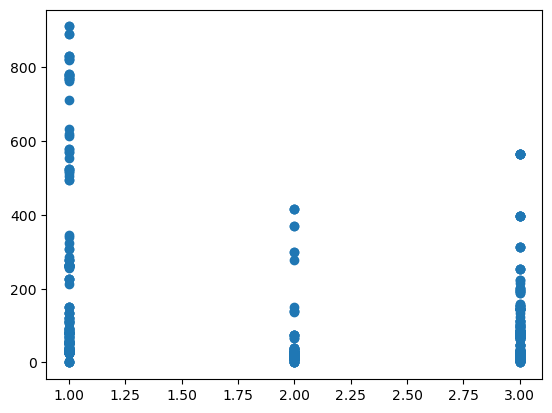

In [156]:
x = titanic['Pclass']
y = titanic['Fare']
plt.scatter(x,y)

We then choose to remove the outliers.

In [157]:
titanic = titanic.drop(titanic[(titanic['Pclass'] == 3) & (titanic['Fare'] > 450)].index)

In [158]:
titanic.dropna(subset=['Embarked'], inplace = True)

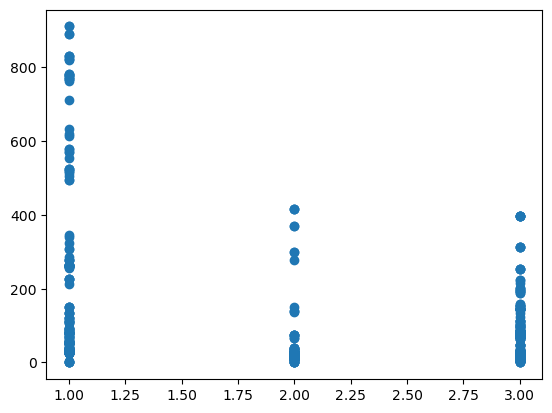

In [159]:
x = titanic['Pclass']
y = titanic['Fare']
plt.scatter(x,y)

## 2. Classification (Lecture 3 & 4)

Combine the exercise from Lecture 3 with exercise 2 from Lecture 4 into one, and construct some classification models to predict if a passenger would survive or not in the Titanic dataset. 

* a) You should have (1) decision tree, (2) random forest, and (3) KNN. You may also vary the configuration of each model type.
* b) You should do necessary data preprocessing (e.g., missing value fill-in, and data scaling if needed for a classifier). 
* c) You should also do cross-validation of your models.
* d) Plot the ROC with AUC for each model you implement.


### Exercises with KNN on Titanic dataset

Now we have handled the data, and filled in the missing values. So now we can do the KNN

In [160]:
titanic = pd.read_csv("data/titanic.csv")

Data preprocessing

In [161]:
titanic["Sex"] = titanic.Sex.replace({'male':0, 'female':1})
age_average = titanic['Age'].mean()
titanic['Age'].fillna(int(age_average), inplace=True)
titanic.dropna(subset=['Embarked'], inplace = True)

In [162]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


Feature selection

In [163]:
features = titanic.columns.drop(['Survived', 'Name', 'Ticket', 'Cabin', 'Embarked', 'PassengerId'])
features

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [164]:
X = titanic[features]
y = titanic['Survived']

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

Decision tree

In [166]:
dtree = DecisionTreeClassifier()

In [167]:
dtree = dtree.fit(X_train, y_train)

In [168]:
y_pred = dtree.predict(X_test)

In [169]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))

Accuracy: 0.797752808988764
Recall: 0.7722772277227723
Precision: 0.7155963302752294


Random forrest


In [170]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold

#criterion='entropy', max_features=5, n_estimators=100, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0) 
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(forest, X, y, cv=kf)
print("The scores from the different splits", scores)
print("The mean is the K-fold scores is: ", scores.mean())

The scores from the different splits [0.79213483 0.81460674 0.82022472 0.85955056 0.79096045]
The mean is the K-fold scores is:  0.8154954611819971


In [171]:
from sklearn.metrics import roc_curve, roc_auc_score
forest.fit(X_train, y_train)
y_pred = forest.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

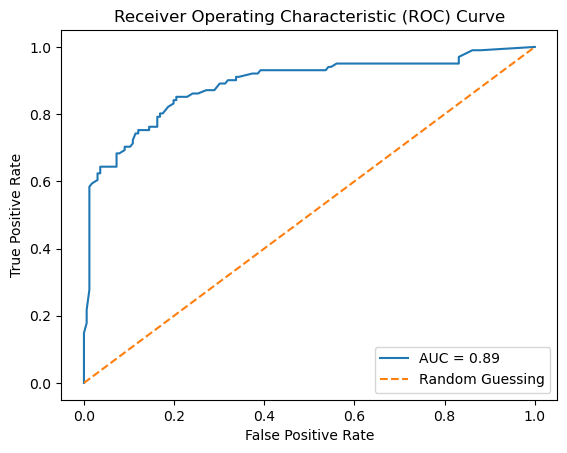

In [172]:
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


In [173]:
import numpy as np

def plot_feature_importances(model, features):
    n_features = len(features)
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    
    plt.yticks(np.arange(n_features), features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

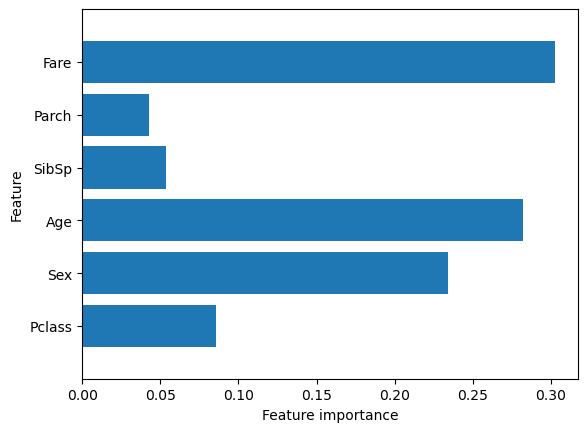

In [174]:
plot_feature_importances(forest, features)

This tells us that the features with most importance towards predicting survival is Fare, Sex and Age.

In [175]:
X = titanic[['Age', 'Fare', 'Sex']]

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [177]:
from sklearn.neighbors import KNeighborsClassifier


def knnRunner(X, y):
    # We create a 2-D array to store all accuracy values
    accuracy_data1 = []
    
    for training_percent in [0.7, 0.8, 0.9]:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-training_percent, random_state=1)

        # We crate a 1-D array to store all accuracy values on this split batch
        accuracy_row = []
        
        for k in range(2, 11):
            # Model intializing
            knn = KNeighborsClassifier(n_neighbors=k)

            # Training (very light compared to an eager learner)
            knn.fit(X_train, y_train)

            # Validation/Test
            y_pred = knn.predict(X_test)

            print("KNN with training_percent={}, k={}:\r".format(training_percent, k))
            
            # Get the accuracy from metrics
            accuracy = metrics.accuracy_score(y_test, y_pred)
            print("Accuracy: {}\r\n".format(accuracy))

            accuracy_row.append(accuracy)
            
        accuracy_data1.append(accuracy_row)
    
    return accuracy_data1

Here we see the data without scaling

In [ ]:
accuracies_no_scaling = knnRunner(X, y)

Now with standardscaler

In [178]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_scaled.describe()

,Age,Fare,Sex
count,8.890000e+02,8.890000e+02,8.890000e+02
mean,1.026550e-16,1.092115e-16,3.601668e-16
std,1.000563e+00,1.000563e+00,1.000563e+00
min,-2.244306e+00,-6.462044e-01,-7.353420e-01
25%,-5.796430e-01,-4.872378e-01,-7.353420e-01
50%,-3.966896e-02,-3.551972e-01,-7.353420e-01
75%,4.231659e-01,-2.207954e-02,1.359911e+00
max,3.894428e+00,9.668551e+00,1.359911e+00


In [180]:
accuracies_standard_scaling = knnRunner(X_scaled, y)

KNN with training_percent=0.7, k=2:
Accuracy: 0.7640449438202247

KNN with training_percent=0.7, k=3:
Accuracy: 0.7640449438202247

KNN with training_percent=0.7, k=4:
Accuracy: 0.7752808988764045

KNN with training_percent=0.7, k=5:
Accuracy: 0.7790262172284644

KNN with training_percent=0.7, k=6:
Accuracy: 0.8052434456928839

KNN with training_percent=0.7, k=7:
Accuracy: 0.7940074906367042

KNN with training_percent=0.7, k=8:
Accuracy: 0.8014981273408239

KNN with training_percent=0.7, k=9:
Accuracy: 0.797752808988764

KNN with training_percent=0.7, k=10:
Accuracy: 0.8014981273408239

KNN with training_percent=0.8, k=2:
Accuracy: 0.7640449438202247

KNN with training_percent=0.8, k=3:
Accuracy: 0.7696629213483146

KNN with training_percent=0.8, k=4:
Accuracy: 0.7640449438202247

KNN with training_percent=0.8, k=5:
Accuracy: 0.7640449438202247

KNN with training_percent=0.8, k=6:
Accuracy: 0.7471910112359551

KNN with training_percent=0.8, k=7:
Accuracy: 0.7752808988764045

KNN with t

c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set 

Now with min-max

In [ ]:
from sklearn.preprocessing import MinMaxScaler

minMaxScaler = MinMaxScaler()
X_scaled_mm = pd.DataFrame(minMaxScaler.fit_transform(X), columns=X.columns)

In [ ]:
accuracies_minmax_scaling = knnRunner(X_scaled_mm, y)

Now visualized in a graph

In [ ]:
columns = [2, 3, 4, 5, 6, 7, 8, 9, 10]
index = ['0.7', '0.8', '0.9']

df_no_scaling = pd.DataFrame(accuracies_no_scaling, columns=columns, index=index).transpose()
df_standard_scaling = pd.DataFrame(accuracies_standard_scaling, columns=columns, index=index).transpose()
df_minmax_scaling = pd.DataFrame(accuracies_minmax_scaling, columns=columns, index=index).transpose()

In [ ]:
def plotAccuracy(col):
    import matplotlib.pyplot as plt

    plt.plot(df_standard_scaling.index, df_standard_scaling[col], 'b.-', label = 'standard scaling', color='pink')
    plt.plot(df_minmax_scaling.index, df_minmax_scaling[col], 'b.-', label = 'minmax scaling', color='blue')
    plt.plot(df_no_scaling.index, df_no_scaling[col], 'b.-', label = 'no scaling', color='green')

    plt.xlabel('K')
    plt.ylabel('KNN accuracy')
    plt.title('Effect of data scaling on KNN for training data ratio={}'.format(col))

    plt.legend()

In [ ]:
plotAccuracy('0.7')

In [ ]:
plotAccuracy('0.8')

In [ ]:
plotAccuracy('0.9')

In [ ]:
columns = [2, 3, 4, 5, 6, 7, 8, 9, 10]
index = ['0.7', '0.8', '0.9']

df_standard_scaling = pd.DataFrame(accuracies_standard_scaling, columns=columns, index=index).transpose()

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df_standard_scaling.index, df_standard_scaling['0.9'], 'b.-', label = '0.9', color='green')
plt.plot(df_standard_scaling.index, df_standard_scaling['0.8'], 'b.-', label = '0.8', color='blue')
plt.plot(df_standard_scaling.index, df_standard_scaling['0.7'], 'b.-', label = '0.7', color='pink')

plt.xlabel('K')
plt.ylabel('KNN accuracy')
plt.title('Effect of training data percentage on KNN')

plt.legend()

## 3. Regression (Lecture 6)

Train a multiple linear regression, a random forest model, and an AdaBoost model on the “boston_housing_data.csv” dataset from Lectures 5 and 6 and remember to do train-test split as well as other necessary pre-processing dataset.

### Multiple Linear Regression (MLR)

In this section we use MLR to predict medv

In [ ]:
data = pd.read_csv("data/boston_housing_data.csv")

In [ ]:
data.head()

In [ ]:
data.info()

In [ ]:
plt.matshow(data.corr())
plt.show()

In [ ]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg

In [ ]:
y = data["medv"]

In [ ]:
reg.fit(data.drop(columns="medv"), y)
reg

In [ ]:
reg.coef_

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
y_pred = reg.predict(data.drop(columns="medv"))

In [ ]:
print("MSE:", mean_squared_error(data['medv'], y_pred))
print("RMSE:", np.sqrt(mean_squared_error(data["medv"], y_pred)))
print("Regression Score:", r2_score(data['medv'], y_pred))

We can tell from the scores that this is not the best performing model in this perticular dataset/usecase.

We should strive for lower scores on the MSE, RMSE and higher on the R2 score

### Random Forest

In this section we use Random Forest Regressor to predict medv

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
reg_rf = RandomForestRegressor()

In [ ]:
reg_rf.fit(data.drop(columns="medv"), data["medv"])

In [ ]:
y_pred_rf = reg_rf.predict(data.drop(columns="medv"))

In [ ]:
print("RMSE:", np.sqrt(mean_squared_error(data["medv"], y_pred_rf)))
print("Regression Score:", r2_score(data['medv'], y_pred_rf))

We can tell from the evaluation values that this performs signifigantly better than multiple linear regression

MSE is not used in this model because it usually doesn't perform with a value of signifigance. 

### AdaBoost

In this section we use AdaBoostRegressor to predict medv

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
reg_ab = AdaBoostRegressor()

In [ ]:
reg_ab.fit(data.drop(columns="medv"), data["medv"])

In [ ]:
y_pred_ab = reg_ab.predict(data.drop(columns="medv"))

In [ ]:
print("RMSE:", np.sqrt(mean_squared_error(data["medv"], y_pred_ab)))
print("Regression Score:", r2_score(data['medv'], y_pred_ab))

We can tell from the evaluation values that this performs signifigantly better than multiple linear regression but worse than random forest.

Our best performing model is the random forest

## 4. Clustering (Lecture 7 & 8)

Exercise 2 (both 2.1 and 2.2) from Lecture 7 and exercise 1 from Lecture 8.

In [ ]:
data = pd.read_csv('data/Ch5_bike_station_locations.csv')

Now we want to show the data head and tail

In [ ]:
data.head()

In [ ]:
data.tail()

In [ ]:
data.shape

Firstly we can plot this, to show that there is clusters showing

In [ ]:
x = data['latitude']
y = data['longitude']
plt.scatter(x,y)
plt.show()

In [ ]:
z = StandardScaler()
data[['latitude','longitude']] = z.fit_transform(data[['latitude','longitude']])

We cant necessarily tell how many clusters we can create from this. But to help us, we can use DBScan and different methods to determine the amount of clusters we need for a conclusive analysis.

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5,min_samples=5)
clusters = dbscan.fit_predict(data)
print("Cluster memberships:\n{}".format(clusters))

If we were to have values of -1, then we would define that as an outlier. What this basically mean is that, when we generalize all points to be within epsilon distance of at least 5 points, then with our specific epsilon, we can encapsulate all points with at least 5 points within epsilon distance. However, if we were to change our epsilon to something signifanctly smaller, we will have most definitely see some outliers, or some -1 from our dbscan.

In [ ]:
mglearn.plots.plot_dbscan()

From the above plot, we can see the amout of clusters that we create with different epsilons and min_samples. We notice that we get 3 pretty solid divided clusters with epsilon 1.5 and the minimum samples being 2 and 3. The others either simplify into 2 clusters or one big cluster. But we can further see if these are the appropriate amount of clusters, by using the Silhouette method.

In [ ]:
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(data))
def compare_clustering_algs(score_func, ref):
    """
    For all included clustering algorithms, get the socre by using 
    the score function *score_func* against the reference *ref*
    """
    
    # Make a list of algorithms to use
    algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

    # Set four sub figures for four approaches
    fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks': (), 'yticks': ()})

    # First, we plot the random cluster assignment
    axes[0].scatter(data['latitude'], data['longitude'], c=random_clusters, cmap=mglearn.cm3, s=60)
    # The score function compares the groundtruth cluter ids in y and the clustering result
    axes[0].set_title("Random assignment: score={:.2f}".format(score_func(ref, random_clusters)))

    # Next, we plot the three clustering algorithms' result
    for ax, algorithm in zip(axes[1:], algorithms):
        # Plot the current algorithm's cluster assignment and cluster centers
        clusters = algorithm.fit_predict(data)
        ax.scatter(data['latitude'], data['longitude'], c=clusters, cmap=mglearn.cm3, s=60)
        ax.set_title("{}: score={:.2f}".format(algorithm.__class__.__name__, score_func(ref, clusters)))

In [ ]:
# compare_clustering_algs(silhouette_score, data)
# fig = plt.gcf()
# fig.suptitle("Silhouette Score", 0.5, 1.05, fontsize=14)

## 5. Key-value stores (Lecture 9)

Exercise 1 from Lecture 9.

## 6. Deep learning Lecture 10

Train a deep neural network to predict if a passenger would survive or not in the Titanic dataset and remember to do train-test split as well as other necessary pre-processing dataset.

In [67]:
titanic = pd.read_csv("data/titanic.csv")

### One-Hot Encoding

In [72]:
# Get all possible categories for the "PClass" column
print(f"Possible values for PClass: {titanic['Pclass'].unique()}")

# Use Pandas to One-Hot encode the PClass category
dataset_with_one_hot = pd.get_dummies(titanic, columns=["Pclass"], drop_first=False)

# Add back in the old Pclass column, for learning purposes
dataset_with_one_hot["Pclass"] = titanic.Pclass

# Print out the first few rows
dataset_with_one_hot.head()

Possible values for PClass: [3 1 2]


,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3,Pclass
0,1,0,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,Unknown,S,0,0,1,3
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1
2,3,1,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,0,0,1,3
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1,0,0,1
4,5,0,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,Unknown,S,0,0,1,3


Same principle. We convert from cabin number and narrow it down to corresponding deck.

In [73]:
dataset_with_one_hot = pd.get_dummies(titanic, columns=["Pclass", "Cabin"], drop_first=False)

cabin_column_names = list(c for c in dataset_with_one_hot.columns if c.startswith("Cabin_"))

print(len(cabin_column_names), "cabins found")

135 cabins found


In [74]:
titanic["Deck"] = [c[0] for c in titanic.Cabin]

print("Decks: ", sorted(titanic.Deck.unique()))

dataset_with_one_hot = pd.get_dummies(titanic, columns=["Pclass", "Deck"], drop_first=False)

deck_of_cabin_column_names = list(c for c in dataset_with_one_hot.columns if c.startswith("Deck_"))



Decks:  ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'U']


In [75]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,Unknown,S,U
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,U
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,Unknown,S,U


### Feature selection

We decide to use random forrest evaluation find the features that have the most influence towards survivability.

In [ ]:
titanic.head()

In [ ]:
features = titanic.columns.drop(['Survived', 'Name', 'Ticket', 'Cabin', 'Deck', 'Embarked', 'PassengerId'])
features

In [ ]:
X = titanic[features]
y = titanic['Survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#criterion='entropy', max_features=5, n_estimators=100, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0) 
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

print("Accuracy of Random Forest: {}".format(metrics.accuracy_score(y_test, y_pred)))

In [ ]:
import numpy as np

def plot_feature_importances(model, features):
    n_features = len(features)
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    
    plt.yticks(np.arange(n_features), features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

In [ ]:
plot_feature_importances(forest, features)

This tells us that the features with most importance towards predicting survival is Fare, Sex and Age.

In [ ]:
X = titanic[['Age', 'Fare', 'Sex']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
X_train = X_train.values.tolist()
X_train

In [ ]:
X_test = X_test.values.tolist()

In [ ]:
y_train

In [ ]:
y_train_oh = [dl.one_hot_encode(y, 2) for y in y_train]
y_train_oh

In [ ]:
y_test_oh = [dl.one_hot_encode(y, 2) for y in y_test]

In [ ]:
import random
random.seed(0)
    
# Name them so we can turn train on and off
dropout1 = dl.Dropout(0.1)
dropout2 = dl.Dropout(0.1)
dropout3 = dl.Dropout(0.1)
    
t_model = dl.Sequential([
    dl.Linear(3, 32),  # Hidden layer 1: size 32
    dropout1,
    dl.Tanh(),
    dl.Linear(32, 16),   # Hidden layer 2: size 16
    dropout2,
    dl.Tanh(),
    dl.Linear(16, 8),   # Hidden layer 3: size 8
    dropout3,
    dl.Tanh(),
    dl.Linear(8, 2)    # Output layer: size 2
])

In [ ]:
from numpy import argmax
import tqdm
def loop(model: dl.Layer,
             images: dl.List[dl.Tensor],
             labels: dl.List[dl.Tensor],
             loss: dl.Loss,
             optimizer: dl.Optimizer = None) -> None:
        correct = 0         # Track number of correct predictions.
        total_loss = 0.0    # Track total loss.
    
        with tqdm.trange(len(images)) as t:
            for i in t:
                predicted = model.forward(images[i])             # Predict.
                if argmax(predicted) == argmax(labels[i]):       # Check for
                    correct += 1                                 # correctness.
                total_loss += loss.loss(predicted, labels[i])    # Compute loss.
    
                # If we're training, backpropagate gradient and update weights.
                if optimizer is not None:
                    gradient = loss.gradient(predicted, labels[i])
                    model.backward(gradient)
                    optimizer.step(model)
    
                # And update our metrics in the progress bar.
                avg_loss = total_loss / (i + 1)
                acc = correct / (i + 1)
                t.set_description(f"mnist loss: {avg_loss:.3f} acc: {acc:.3f}")

In [ ]:
from scratch.deep_learning import main
optimizer = dl.Momentum(learning_rate=0.01, momentum=0.99)
loss = dl.SoftmaxCrossEntropy()
    
# Enable dropout and train (takes > 20 minutes on my laptop!)
dropout1.train = dropout2.train = dropout3.train = True
loop(t_model, X_train, y_train_oh, loss, optimizer)

In [ ]:
# Disable dropout and evaluate
dropout1.train = dropout2.train = dropout3.train = False
loop(t_model, X_test, y_test_oh, loss)

In [ ]:
y_pred = [t_model.forward(x) for x in X_test]
y_pred

In [ ]:
dl.softmax(y_pred)

In [ ]:
y_pred_binary = [1 if x[1] > 0.5 else 0 for x in dl.softmax(y_pred)]
y_pred_binary

In [ ]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_binary))
print("Recall:", metrics.recall_score(y_test, y_pred_binary))
print("Precision:", metrics.precision_score(y_test, y_pred_binary))
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred_binary))

In [ ]:
optimizer = dl.Momentum(learning_rate=0.001, momentum=0.99)

dropout1.train = dropout2.train = dropout3.train = True

for _ in range(15):
    loop(t_model, X_train, y_train_oh, loss, optimizer)

In [ ]:
dropout1.train = dropout2.train = False
loop(t_model, X_test, y_test_oh, loss)

In [ ]:
y_pred = [t_model.forward(x) for x in X_test]
y_pred_binary = [1 if x[1] > 0.5 else 0 for x in dl.softmax(y_pred)]

In [ ]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_binary))
print("Recall:", metrics.recall_score(y_test, y_pred_binary))
print("Precision:", metrics.precision_score(y_test, y_pred_binary))
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred_binary))

### Keras

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
keras_model = keras.Sequential(
    [
        keras.Input(shape=(3)),  # As we have 3 columns in our input data X
        layers.Dense(32, activation='tanh'),
        layers.Dropout(0.1),
        layers.Dense(16, activation='tanh'),
        layers.Dropout(0.1),
        layers.Dense(8, activation='tanh'),
        layers.Dropout(0.1),
        layers.Dense(2, activation="softmax")  # Here we specify that we want the last layer to have a softmax activation function
    ]
)

In [ ]:
keras_model.summary()

In [ ]:
keras_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
X_train_keras = np.array(X_train)
X_train_keras.shape

In [ ]:
y_train_keras = np.array(y_train_oh)
y_train_keras.shape

In [ ]:
keras_model.fit(X_train_keras, y_train_keras, batch_size=1, epochs=16)

In [ ]:
score = keras_model.evaluate(np.array(X_test), np.array(y_test_oh), verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

In [ ]:
y_pred_keras = keras_model.predict(np.array(X_test))
y_pred_keras

In [ ]:
y_pred_keras_binary = [1 if x[1] > 0.5 else 0 for x in y_pred_keras]
y_pred_keras_binary

In [ ]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_keras_binary))
print("Recall:", metrics.recall_score(y_test, y_pred_keras_binary))
print("Precision:", metrics.precision_score(y_test, y_pred_keras_binary))
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred_keras_binary))

## 7. MapReduce (Lecture 13)

All exercises from Lecture 13.

## 8. Time Series Analysis (Lecture 14 & 15)

Do a time series analysis of the Copenhagen ice cream dataset ("cph_ice_cream_searches.csv") from Lectures 14 and 15.

## 9. IoT (Lecture 17)

All exercises from Lecture 17.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('data/diabetes.csv')

In [ ]:
data.head()

So now we have the data. Next we do is choose our features. We do this by dropping the other columns that we dont want. We also drop the Outcome feature, since it's our class label.

In [ ]:
features = data.columns.drop(['Pregnancies','SkinThickness','BMI','DiabetesPedigreeFunction','Age','Outcome'])
features

Now we can define our x and y for the data.

In [ ]:
x = data[features]
y = data['Outcome']
print(x,y)

The next exercise, is to Normalize our features to between [0,1] using MinMax scaling. The MinMax datascaling works by subtracting the minimum value in the feature and then divides by the range. Where the range is the difference between the original maximum and original minimum. So if the max is 5 and the minimum is 1, and we have the value 3. Then we say (3-1)/4=0.5. What this does, is ensuring that all of our data is scaled between 0 and 1, which is an easier way to represent outlier data and show it compared to the mean.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

minMaxScaler = MinMaxScaler(feature_range=(0,1))
X_scaled = pd.DataFrame(minMaxScaler.fit_transform(x), columns = x.columns)
X_scaled.describe()

In [ ]:
X_scaled

We have now normalized our data. The next exercise involves saving the scaled data into another dataset. So firstly we change y to being a dataframe, and then we concatenate them.

In [ ]:
yf = pd.DataFrame(y, columns=['Outcome'])
S = pd.concat([X_scaled,y], axis=1)
S

In [ ]:
features = S.columns.drop('Outcome')
features

In [ ]:
X = S[features]

In [ ]:
X= X[:100]
X

In [ ]:
y = S[['Outcome']]
y

In [ ]:
y = y[:100]
y

This next exercise is regarding MQTT (Message Queue Telemetry Transport). It's a standard messaging protocol for IoT. Before sending or recieving a message, a client must first connect to a server. So we make both a broker and a client. The description of the exercise is: "The subscriber continuously receives the data. For each latest record r received, apply the 
3NN classification to the last 5 records before r, and compare the classification result with the 
Outcome label in r". But first, I will make a training.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [ ]:
X_train = X_train.values.tolist()
X_test = X_test.values.tolist()
y_train = y_train.values.tolist()
y_test = y_test.values.tolist()

Now we have our training, then we can set up our broker and subscriber.

In [ ]:
import logging
import time
import paho.mqtt.client as mqtt
# We create a client as the data subscriber and specify its actions for particular events
mqttc = mqtt.Client()

# Now, we connect to the data broker.
mqttc.connect("mqtt.eclipseprojects.io", 1883, 60)

if __name__ == "__main__":
    print("Publishing...")
    
    index = 0
    while (index >= 0):
        # Get the current data reading to send out
        data = X_train[index][0]
        print(data)
       
        # Publish the data reading as 'Diabetes/Glucose'
        mqttc.publish("Glucose", str(data))
        # We send the next reading after 2 seconds
        time.sleep(0.2)
        if index == len(X_train) -1:
            index = -1
        else:
            index = index + 1

# This function defines what to do when we connect to the broker
def on_connect(client, userdata, flags, rc):
    print("Connected with result code " + str(rc))
    # We subscribe to this particular data. There may be other data published by the same subscriber or broker.
    client.subscribe("Glucose")

# This function defines what to do when we receives a message from the brokder
def on_message(client, userdata, msg):
    print("Received Glucose: ", msg.payload.decode())
    global current_glucose
    current_glucose = msg.payload.decode()
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    print(f'prediction {y_pred}: real {y_test}')

# We create a client as the data subscriber and specify its actions for particular events
mqttc = mqtt.Client()
mqttc.on_connect = on_connect
mqttc.on_message = on_message

# Now, we connect to the data broker.
mqttc.connect("mqtt.eclipseprojects.io", 1883, 60)
# As a simple example, we just keep the data listening/receiving on and on...
mqttc.loop_start()

In [ ]:
import dash
from dash import html, dcc, Input, Output

import dash_bootstrap_components as dbc
import paho.mqtt.client as mqtt

global current_glucose


In [ ]:
# -----------------------------------------------------------------------------
# Defining Dash app
# -----------------------------------------------------------------------------
app = dash.Dash(external_stylesheets=[dbc.themes.DARKLY])

# -----------------------------------------------------------------------------
# Glucose card
# -----------------------------------------------------------------------------
card = dbc.Card(
    html.H4(id="Glucose")
)

In [ ]:
# -----------------------------------------------------------------------------
# Application layout
# -----------------------------------------------------------------------------
app.layout = dbc.Container(
    [
        dcc.Interval(id='update', n_intervals=0, interval=1000*3),
        html.H1("Monitoring IoT Sensor Data with Plotly Dash"),
        html.Hr(),
        dbc.Row(dbc.Col(card, lg=4))
    ]
)

In [ ]:
# -----------------------------------------------------------------------------
# Callback for updating Glucose data
# -----------------------------------------------------------------------------
@app.callback(
    Output('Glucose', 'children'),
    Input('update', 'n_intervals')
)

def update_glucose(timer):
    return ("Glucose: " + str(current_glucose) + " at time " + str(timer))

In [ ]:
# -----------------------------------------------------------------------------
# Main function
# -----------------------------------------------------------------------------
if __name__ == "__main__":
    app.run_server(debug=False)